In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [471]:
rawData = pd.read_csv("~/Desktop/RDC_Inventory_Core_Metrics_State_History.csv")
rawData = pd.DataFrame(rawData)

In [472]:
rawData.columns
rawData.shape

(2805, 39)

In [473]:
rawData['month_date_yyyymm'] = rawData['month_date_yyyymm'].astype(str)
rawData['yyyy'] = rawData['month_date_yyyymm'].str[:4]
rawData['mm'] = rawData['month_date_yyyymm'].str[4:]
rawData['yyyy'] = rawData['yyyy'].astype(int)
rawData['mm'] = rawData['mm'].astype(int)
rawData.set_index(['yyyy', 'mm', 'state'], inplace=True)
rawData = rawData.sort_index()

In [474]:
data2016 = rawData[rawData.index.get_level_values('yyyy') == 2016]
data2017 = rawData[rawData.index.get_level_values('yyyy') == 2017]
data2018 = rawData[rawData.index.get_level_values('yyyy') == 2018]
data2019 = rawData[rawData.index.get_level_values('yyyy') == 2019]
data2020 = rawData[rawData.index.get_level_values('yyyy') == 2020]

yearsData = [data2016, data2017, data2018, data2019, data2020]
print([year.shape for year in yearsData])

[(306, 38), (612, 38), (612, 38), (612, 38), (612, 38)]


In [475]:
data2016 = data2016.copy()
data2017 = data2017.copy()
data2018 = data2018.copy()
data2019 = data2019.copy()
data2020 = data2020.copy()

Creating copies of all slices

Setting the index for all datasets

In [476]:
keepCols = ['median_listing_price', 'active_listing_count', 'median_days_on_market', 
            'new_listing_count', 'price_increased_count', 'price_reduced_count',
            'pending_listing_count', 'median_listing_price_per_square_foot', 'median_square_feet',
            'average_listing_price', 'total_listing_count', 'pending_ratio', 'mm', 'state']
q3_20 = data2020.reset_index().loc[:, keepCols]
q3_19 = data2019.reset_index().loc[:, keepCols]
q3_18 = data2018.reset_index().loc[:, keepCols]
q3_17 = data2017.reset_index().loc[:, keepCols]
q3_16 = data2016.reset_index().loc[:, keepCols]

q3_20 = q3_20.set_index(['mm', 'state'])
q3_19 = q3_19.set_index(['mm', 'state'])
q3_18 = q3_18.set_index(['mm', 'state'])
q3_17 = q3_17.set_index(['mm', 'state'])
q3_16 = q3_16.set_index(['mm', 'state'])

In [477]:
calc20_19 = q3_20 - q3_19
calc19_18 = q3_19 - q3_18
calc18_17 = q3_18 - q3_17
calc17_16 = q3_17 - q3_16

calcs = [calc20_19, calc19_18, calc18_17, calc17_16]
print([calc.shape for calc in calcs])

calc20_19.head(10)

[(612, 12), (612, 12), (612, 12), (612, 12)]


median_listing_price  active_listing_count  \
mm state                                                              
1  alabama                            20925.0                 -3646   
   alaska                              6000.5                  -361   
   arizona                            38122.0                 -7853   
   arkansas                            8850.0                 -3104   
   california                         42306.0                -17066   
   colorado                           44005.0                 -2643   
   connecticut                        20200.0                 -3363   
   delaware                           26400.0                  -956   
   district of columbia               72502.5                  -115   
   florida                            14950.0                -22303   

                         median_days_on_market  new_listing_count  \
mm state                                                            
1  alabama                               -10.0               -460   
   alaska                                -13.0               -188   
   arizona                                 0.0              -2536   
   arkansas                               -7.0               -520   
   california                              8.0              -6508   
   colorado                                9.0              -2168   
   connecticut                            -8.5               -396   
   delaware                               -3.5               -216   
   district of columbia                    1.5                 44   
   florida                                -4.0              -6780   

                         price_increased_count  price_reduced_count  \
mm state                                                              
1  alabama                                 -28                 -420   
   alaska                                  -16                  -64   
   arizona                                  16                -5084   
   arkansas                                  4                 -436   
   california                               40                -5256   
   colorado                                 80                -1352   
   connecticut                              -4                 -256   
   delaware                                 60                 -164   
   district of columbia                      0                  -68   
   florida                                -336                -9188   

                         pending_listing_count  \
mm state                                         
1  alabama                                1515   
   alaska                                   62   
   arizona                                1824   
   arkansas                                612   
   california                             8013   
   colorado                               -464   
   connecticut                              29   
   delaware                                139   
   district of columbia                    -52   
   florida                                7577   

                         median_listing_price_per_square_foot  \
mm state                                                        
1  alabama                                           7.592036   
   alaska                                            1.786530   
   arizona                                          12.701675   
   arkansas                                          4.825362   
   california                                       10.041667   
   colorado                                         23.212222   
   connecticut                                      -4.696764   
   delaware                                         12.124500   
   district of columbia                             26.026618   
   florida                                           7.671875   

                         median_square_feet  average_listing_price  \
mm state                              

Creating sets from two keys

In [478]:
monthSet = set(calc20_19.index.levels[0])
stateSet = set(calc20_19.index.levels[1])

print(monthSet)
print(stateSet)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
{'new mexico', 'wyoming', 'nevada', 'alaska', 'arkansas', 'new york', 'florida', 'georgia', 'montana', 'utah', 'louisiana', 'tennessee', 'mississippi', 'iowa', 'oregon', 'rhode island', 'vermont', 'idaho', 'arizona', 'new jersey', 'washington', 'kansas', 'connecticut', 'south carolina', 'delaware', 'colorado', 'massachusetts', 'minnesota', 'illinois', 'indiana', 'missouri', 'oklahoma', 'maine', 'new hampshire', 'south dakota', 'north carolina', 'ohio', 'nebraska', 'kentucky', 'texas', 'virginia', 'california', 'maryland', 'wisconsin', 'district of columbia', 'west virginia', 'pennsylvania', 'north dakota', 'michigan', 'hawaii', 'alabama'}


In [479]:
mlpy2016 = data2016['median_listing_price_yy'].reset_index()
mlpy2017 = data2017['median_listing_price_yy'].reset_index()
mlpy2018 = data2018['median_listing_price_yy'].reset_index()
mlpy2019 = data2019['median_listing_price_yy'].reset_index()
mlpy2020 = data2020['median_listing_price_yy'].reset_index()

mlpy2016 = mlpy2016.drop(columns=['yyyy']).set_index(['mm', 'state'])
mlpy2017 = mlpy2017.drop(columns=['yyyy']).set_index(['mm', 'state'])
mlpy2018 = mlpy2018.drop(columns=['yyyy']).set_index(['mm', 'state'])
mlpy2019 = mlpy2019.drop(columns=['yyyy']).set_index(['mm', 'state'])
mlpy2020 = mlpy2020.drop(columns=['yyyy']).set_index(['mm', 'state'])

mlpyAll = pd.concat([mlpy2016, mlpy2017, mlpy2018, mlpy2019, mlpy2020], axis=1)
mlpyAll.columns = ['mlpy2016', 'mlpy2017', 'mlpy2018', 'mlpy2019', 'mlpy2020']

mlpyAll.iloc[306:317]

mlpy2016  mlpy2017  mlpy2018  mlpy2019  mlpy2020
mm state                                                                 
1  alabama                    NaN       NaN    0.0838    0.0889    0.0973
   alaska                     NaN       NaN    0.0015    0.0423    0.0214
   arizona                    NaN       NaN    0.0681    0.0455    0.1157
   arkansas                   NaN       NaN    0.0638    0.0588    0.0492
   california                 NaN       NaN    0.0342    0.0514    0.0806
   colorado                   NaN       NaN    0.0688   -0.0150    0.0978
   connecticut                NaN       NaN   -0.0001    0.0007    0.0595
   delaware                   NaN       NaN    0.0351    0.0681    0.0883
   district of columbia       NaN       NaN   -0.0109    0.0891    0.1174
   florida                    NaN       NaN    0.0481    0.0003    0.0460
   georgia                    NaN       NaN    0.1252    0.0400    0.0545

Used the above for some investigational work to try and figure out formula.

The median_listing_price_yy is derived through the following equation (e.g. 2019 and 2020):

(difference in median_listing_price from 2019-2020) / (median_listing_price in 2019)

In [480]:
mlp2020 = data2020['median_listing_price'].reset_index()
mlp2019 = data2019['median_listing_price'].reset_index()
mlp2018 = data2018['median_listing_price'].reset_index()
mlp2017 = data2017['median_listing_price'].reset_index()
mlp2016 = data2016['median_listing_price'].reset_index()

mlp2020 = mlp2020.drop(columns=['yyyy']).set_index(['mm', 'state'])
mlp2019 = mlp2019.drop(columns=['yyyy']).set_index(['mm', 'state'])
mlp2018 = mlp2018.drop(columns=['yyyy']).set_index(['mm', 'state'])
mlp2017 = mlp2017.drop(columns=['yyyy']).set_index(['mm', 'state'])
mlp2016 = mlp2016.drop(columns=['yyyy']).set_index(['mm', 'state'])

mlp20_19 = calc20_19['median_listing_price'].reset_index()
mlp19_18 = calc19_18['median_listing_price'].reset_index()
mlp18_17 = calc18_17['median_listing_price'].reset_index()
mlp17_16 = calc17_16['median_listing_price'].reset_index()

mlp20_19 = mlp20_19.set_index(['mm', 'state'])
mlp19_18 = mlp19_18.set_index(['mm', 'state'])
mlp18_17 = mlp18_17.set_index(['mm', 'state'])
mlp17_16 = mlp17_16.set_index(['mm', 'state'])

mlps = [mlp2020, mlp2019, mlp2018, mlp2017, mlp2016]
deltamlps = [mlp20_19, mlp19_18, mlp18_17, mlp17_16]
print([mlp.shape for mlp in mlps])
print([mlp.shape for mlp in deltamlps])

[(612, 1), (612, 1), (612, 1), (612, 1), (306, 1)]
[(612, 1), (612, 1), (612, 1), (612, 1)]


In [481]:
newmlpy2020 = mlp20_19 / mlp2019
newmlpy2019 = mlp19_18 / mlp2018
newmlpy2018 = mlp18_17 / mlp2017
newmlpy2017 = mlp17_16 / mlp2016

newmlps = [newmlpy2020, newmlpy2019, newmlpy2018, newmlpy2017]
print([newmlp.shape for newmlp in newmlps])

newmlpy2020.head

[(612, 1), (612, 1), (612, 1), (612, 1)]


<bound method NDFrame.head of                   median_listing_price
mm state                              
1  alabama                    0.097326
   alaska                     0.021350
   arizona                    0.115739
   arkansas                   0.049180
   california                 0.080630
...                                ...
12 virginia                   0.090709
   washington                 0.110988
   west virginia              0.003649
   wisconsin                  0.041667
   wyoming                   -0.011007

[612 rows x 1 columns]>

In [482]:
newmlpy17to20 = pd.concat([newmlpy2017, newmlpy2018, newmlpy2019, newmlpy2020], axis=1)
newmlpy17to20 = newmlpy17to20.round(4)
newmlpy17to20.columns = ['newmlpy2017', 'newmlpy2018', 'newmlpy2019', 'newmlpy2020']
newmlpy17to20.iloc[306:317]

newmlpy2017  newmlpy2018  newmlpy2019  newmlpy2020
mm state                                                                   
7  alabama                    0.0532       0.0933       0.0935       0.0795
   alaska                    -0.0337       0.0188       0.0465       0.0476
   arizona                    0.0512       0.0772       0.0649       0.0952
   arkansas                   0.0366       0.0871       0.0558       0.0741
   california                 0.0793       0.0187       0.0591       0.1991
   colorado                   0.0802       0.0228       0.0345       0.0938
   connecticut                0.1143      -0.0762       0.0256       0.0754
   delaware                   0.0004       0.0711       0.0833       0.0554
   district of columbia       0.0449       0.0562       0.0171       0.0727
   florida                    0.0829       0.0148       0.0174       0.0270
   georgia                    0.1202       0.0872       0.0222       0.0920

We can now hypothesize that the median_listing_price_mm column is derived using a similar equation to above but with using the successive month rather than the year

e.g. Jan, 2020 - Feb, 2020:

(difference in median_listing_price from Jan2020-Feb2020) / (median_listing_price in Jan2020)

In [483]:
mlpJan2020 = mlp2020[mlp2020.index.get_level_values('mm') == 1].reset_index()
mlpFeb2020 = mlp2020[mlp2020.index.get_level_values('mm') == 2].reset_index()

mlpJan2020 = mlpJan2020.drop(columns=['mm']).set_index(['state'])
mlpFeb2020 = mlpFeb2020.drop(columns=['mm']).set_index(['state'])

mlp2020_JanFeb = mlpFeb2020 - mlpJan2020
newmlpm_JanFeb2020 = mlp2020_JanFeb / mlpJan2020

newmlpm_JanFeb2020.shape

(51, 1)

Based on the definitions of the columns, we can infer that the new_listings and price_reduced_listings are included in the active_listings columns based on the following logic:

a. if a property is "active"; it is ready for sale
b. if a property is "new", it means a a new listing is created for that property meaning it should be active
c. if a property had its "price_reduced", it means it's price on an already active listing has been brought down, maintaining its status as active

We can test this by doing the following:

In [484]:
total_ALC = rawData['active_listing_count'].sum()
total_NLC = rawData['new_listing_count'].sum()
total_PRC = rawData['price_reduced_count'].sum()

total_NLC_PRC = total_NLC + total_PRC

if total_NLC <= total_ALC and total_PRC <= total_ALC and total_NLC_PRC <= total_ALC:
    print("NLCs and PRCs are likely included in active listings.")
else:
    print("NLCs and PRCs are likely not properly included in active listings.")

NLCs and PRCs are likely included in active listings.


If we sum all the status columns, we will notice that the number is greater than the total number of listing i.e. active +  pending + new + price reduced + price increased > total listings

Based on this information, we can infer that multiple status columns are taken into account for active_listings. As such, the total columns is derived by adding active listing and pending listings

In [485]:
myPLC = rawData['pending_listing_count'].reset_index()
myALC = rawData['active_listing_count'].reset_index()

myPLC = myPLC.set_index(['yyyy', 'mm', 'state'])
myALC = myALC.set_index(['yyyy', 'mm', 'state'])

myTotal = pd.concat([myPLC, myALC], axis=1)
myTotal['total_listing_count'] = myTotal['pending_listing_count'] + myTotal['active_listing_count']
myTotal.shape

(2805, 3)

For Q8, I'm not sure if adding the year as an index is necessary since the entire measure (based on how I understood it) is the difference between 2017 to 2020, meaning all 51 entries for the _yy will be 2020-2017

In [486]:
q8_mlp2017 = mlp2017 = data2017['median_listing_price'].reset_index()
q8_mlp2020 = mlp2020 = data2020['median_listing_price'].reset_index()

q8_mlp2017 = q8_mlp2017.drop(columns=['yyyy']).set_index(['mm', 'state'])
q8_mlp2020 = q8_mlp2020.drop(columns=['yyyy']).set_index(['mm', 'state'])

mlp_2017_2020 = q8_mlp2020 - q8_mlp2017
mlpy_2017_2020 = mlp_2017_2020 / q8_mlp2017
mlpy_2017_2020['yyyy'] = '2017-2020'
mlpy_2017_2020.rename(columns={'median_listing_price': 'MLP_yy_2017_2020'}, inplace=True)
mlpy_2017_2020 = mlpy_2017_2020.reset_index().set_index(['yyyy', 'mm', 'state'])
mlpy_2017_2020.head

<bound method NDFrame.head of                             MLP_yy_2017_2020
yyyy      mm state                          
2017-2020 1  alabama                0.294968
             alaska                 0.066110
             arizona                0.245974
             arkansas               0.181847
             california             0.175008
...                                      ...
          12 virginia               0.214875
             washington             0.351534
             west virginia          0.037724
             wisconsin              0.250313
             wyoming                0.081616

[612 rows x 1 columns]>

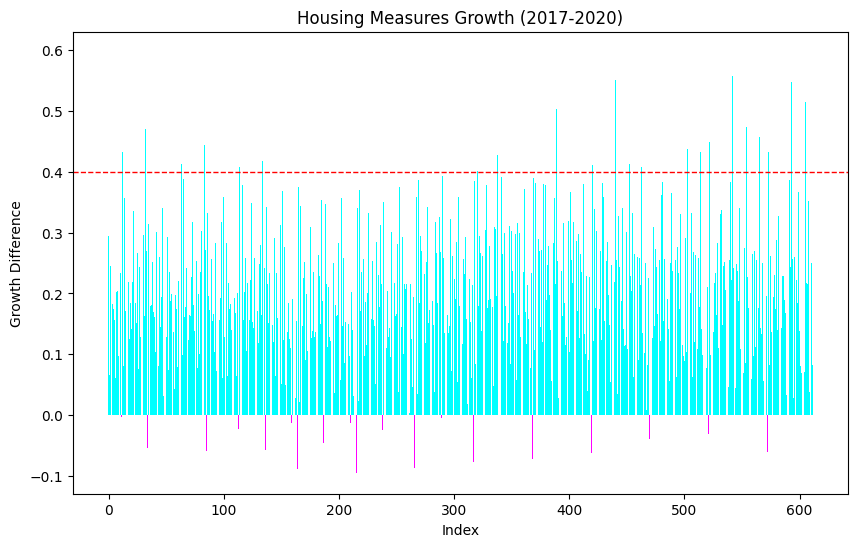

In [491]:
MLP_yy_2017_2020 = mlpy_2017_2020['MLP_yy_2017_2020']
colors = []

for value in MLP_yy_2017_2020:
    if value > 0:
        colors.append('cyan')
    elif value < 0:
        colors.append('magenta')
    else:
        colors.append('white')

plt.figure(figsize=(10, 6))
plt.bar(range(len(MLP_yy_2017_2020)), MLP_yy_2017_2020, color=colors)
plt.axhline(y=0.4, linestyle='--', color='red', linewidth=1)
plt.xlabel('Index')
plt.ylabel('Growth Difference')
plt.title('Housing Measures Growth (2017-2020)')
plt.show()